How to write your report
----------------------

By now, you should be fairly comfortable with using/tweaking the Notebook. Here we're going a little bit details how to write your own report and publish it.

As seen from the Notebook examples, your report is composed of code cells and Markdown cells. 

Here some additional commands you will find useful in writing your own Notebook:

1. #### insert a Cell above current cell  
    ESC (Escape button, swtich to "command" mode) -> A (above) -> M (Markdown) -> enter (swtich to "edit model")  
    *replace A with B for below*
    *replace M with Y for code cell*  
    alternatively through  menu: Insert -> insert cell above  
2. #### split a cell  
    SHIFT + CTRL + - 
    
see [this link](https://sowingseasons.com/blog/reference/2016/01/jupyter-keyboard-shortcuts/23298516) for a complete list of short cut for Jupyter Notebook

see [this link](http://daringfireball.net/projects/markdown/dingus) for a complete list of Markdown commands


Below we provide a template for your report, feel free to use the script in Notebook from previous days and modify the section as needed.

How to publish your report
------------------------
1. create a github account at https://github.com/
2. create a new respistory: go to the + sign on upper right corner -> New repository
3. give it a name, and select public and check "Initialize this repository with a README" box
4. go to the main page of your repository - the url is in the form of "https://github/[account ID]/[repositoryName]"
5. click on "Upload file" button to update your *.ipynb file
6. click on the file uploaded and you should be able to see the report (in order to see the results, you need to execute the cells first)
7. share it!!

an example of the report can be found here:
https://github.com/lujiec/playtupus_test/blob/master/Write_and_publish_report.ipynb



---

# Report Title
### by firstName lastName
### date

## Data collection
describe how the data is collected (location, time, machine etc.)

## Data loading and visualization

In [ ]:
get_ipython().magic('matplotlib inline')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platypus.io.logs
import ds4hs.plot_funcs 

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
log_filename = 'platypus_20160609_094442.txt'
data = platypus.io.logs.load_v4_2_0(log_filename)
print("Available sensors/channels:")
for s in data.keys():
    if s == 'pose' or s == 'BATTERY':
        continue
    for c in data[s].columns.values:
        print("  {:s}, {:s}".format(s, c))
        

Available sensors/channels:
  ATLAS_DO, do
  ES2, ec
  ES2, temp
  ATLAS_PH, ph


In [4]:
ES2 = ds4hs.plot_funcs.get_data(data, 'ES2')
DO =  ds4hs.plot_funcs.get_data(data, 'ATLAS_DO')
PH = ds4hs.plot_funcs.get_data(data, 'ATLAS_PH')
ES2.head(5)

,ec,temp,latitude,longitude
time,,,,
2016-06-09 15:44:46.107,0,29.6,41.377874,2.141625
2016-06-09 15:44:47.605,0,29.6,41.377874,2.141620
2016-06-09 15:44:49.106,0,29.5,41.377828,2.141590
2016-06-09 15:44:50.608,0,29.5,41.377813,2.141569
2016-06-09 15:44:52.109,0,29.6,41.377820,2.141565


/Users/lujiec/anaconda/envs/platypus/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


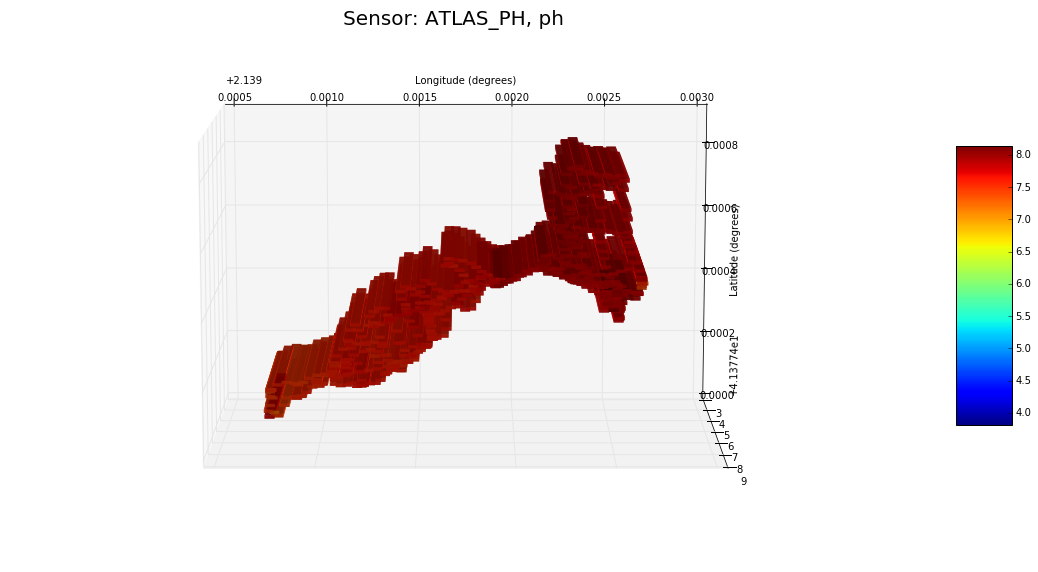

In [6]:
#ds4hs.plot_funcs.plot_3D_trail(ES2, 'ec', 'ES2')
#ds4hs.plot_funcs.plot_3D_trail(ES2, 'temp', 'ES2')
#ds4hs.plot_funcs.plot_3D_trail(DO, 'do', 'ATLAS_DO')
ds4hs.plot_funcs.plot_3D_trail(PH, 'ph', 'ATLAS_PH')

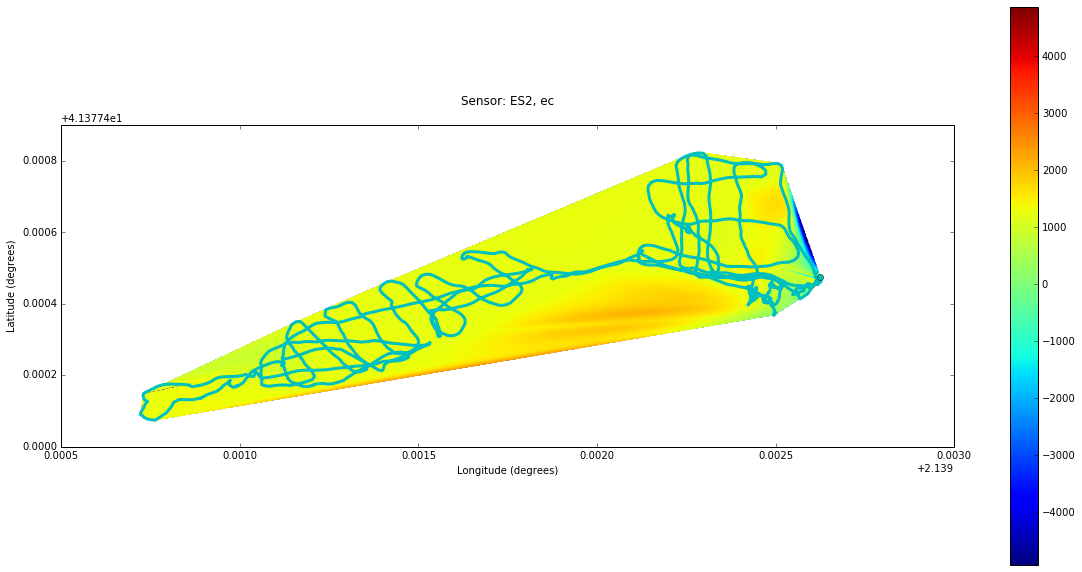

In [7]:
ds4hs.plot_funcs.plot_2D_surface(ES2, 'ec', 'ES2')
#ds4hs.plot_funcs.plot_2D_surface(ES2, 'temp', 'ES2')
#ds4hs.plot_funcs.plot_2D_surface(DO, 'do', 'ATLAS_DO')
#ds4hs.plot_funcs.plot_2D_surface(PH, 'ph', 'ATLAS_PH')
        

### Merge into a single data frame

In [62]:
ts = ds4hs.plot_funcs.merge_ts(ES2, DO, PH)
ts.head(5)

,ec,temp,do,ph
2016-05-19 17:36:33,0.0,22.5,7.4900,NaN
2016-05-19 17:36:34,0.0,22.5,7.4975,NaN
2016-05-19 17:36:35,0.0,22.5,7.5050,4.47300
2016-05-19 17:36:36,0.0,22.5,7.5125,4.47125
2016-05-19 17:36:37,0.0,22.5,7.5200,4.46950


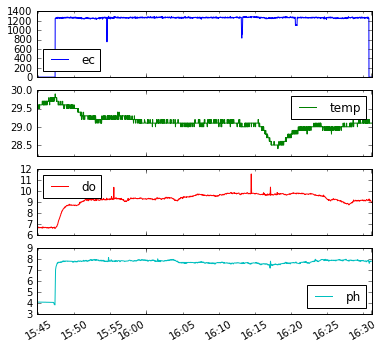

In [6]:
ts.plot(subplots=True, figsize=(6, 6));

## Data cleaning

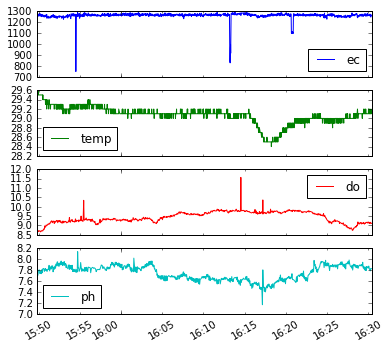

In [7]:
#remove beginning and ending portion of the data
ts2 = ts.iloc[300:(ts.shape[0]-50)] 
ts2.plot(subplots=True, figsize=(6, 6));

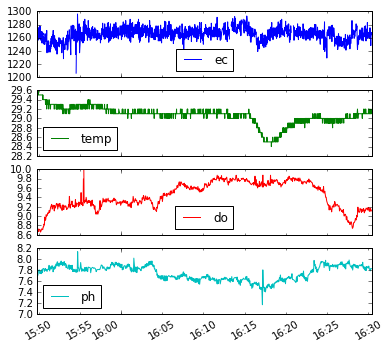

In [63]:
### clean up some outliers
ts2['ec'][ts2['ec']<1200] = np.nan;ts2['ec'].interpolate()
ts2['do'][ts2['do']>10] = np.nan; ts2['do'].interpolate()
ts2.plot(subplots=True, figsize=(6, 6));

## Data exploration
### distributions

In [64]:
ec1 = ts2['ec']
ec1.head(5)

2016-06-09 15:49:46    1264.0
2016-06-09 15:49:47    1273.0
2016-06-09 15:49:48    1275.5
2016-06-09 15:49:49    1278.0
2016-06-09 15:49:50    1258.0
Freq: S, Name: ec, dtype: float64

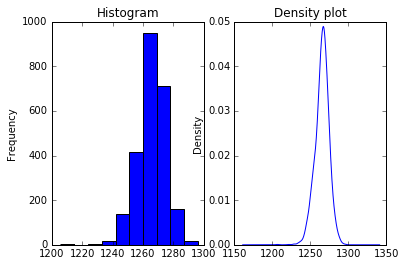

In [65]:
plt.subplot(1,2,1)
ec1.plot.hist(); plt.title('Histogram')
plt.subplot(1,2,2)
ec1.plot.kde(); plt.title('Density plot')

### Explore Variable relationships

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11443cb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11446f2b0>]], dtype=object)

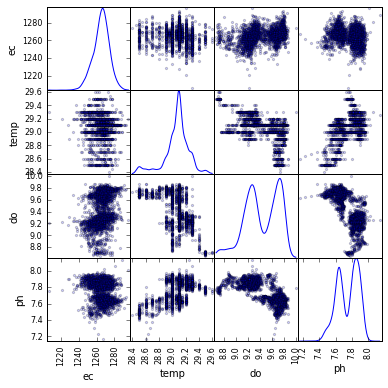

In [66]:
#scatter plot matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(ts2, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113ae1d68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113bfe160>], dtype=object)

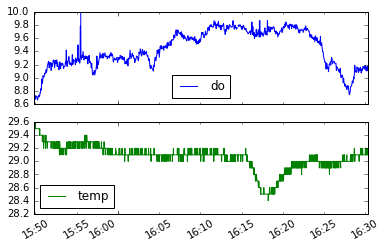

In [67]:
df = ts2[['do','temp']]
df.plot(subplots=True)  # trace plot

In [47]:
#linear model
import statsmodels.formula.api as smf
res2 = smf.ols('do~temp', data=ts2).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     do   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     911.2
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.17e-170
Time:                        17:28:09   Log-Likelihood:                 2.2212
No. Observations:                2428   AIC:                           -0.4424
Df Residuals:                    2426   BIC:                             11.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     32.2749      0.757     42.645      0.0

### Comparing with Pittsburgh data


In [82]:
#prepare data for comparison
ts_bcn = ts2
ts_bcn.dropna(subset=['ec','do'], inplace=True)

log_filename = 'platypus_20160519_013623.txt'
data = platypus.io.logs.load_v4_2_0(log_filename)
ES2 = ds4hs.plot_funcs.get_data(data, 'ES2')
DO =  ds4hs.plot_funcs.get_data(data, 'ATLAS_DO')
PH = ds4hs.plot_funcs.get_data(data, 'ATLAS_PH')
ts = ds4hs.plot_funcs.merge_ts(ES2, DO, PH)
ts_pgh = ts.iloc[600:(ts.shape[0]-300)]



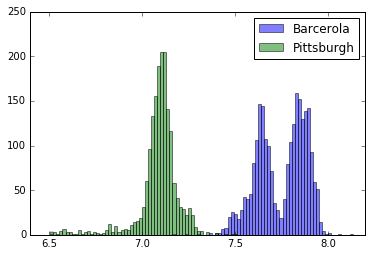

In [96]:
measure_name='ph'
x = ts_bcn[measure_name]
y = ts_pgh[measure_name]
bins = numpy.linspace(min(x.min(),y.min()),max(x.max(),y.max()),100)
plt.hist(x, bins,alpha=0.5, label='Barcerola')
plt.hist(y, bins,alpha=0.5, label='Pittsburgh')
plt.legend(loc='upper right')
plt.show()

In [97]:
import statsmodels.api as sm
import statsmodels.stats as st

st.weightstats.ttest_ind(ts_bcn['ec'],ts_pgh['ec'])




(851.29047167039926, 0.0, 4142.0)

## Conclusions/Reflections
what do you learn from the analysis